# Import Necessary Modules/Packages

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
# try to run this code if the plot doesn't show up
import plotly.offline as po
po.init_notebook_mode(connected=True)

# Data Cleaning

## Read The Dataset and Find Its Characteristic

What we will going to do here are:
- Read the data outline
- Read dataframe's informations
- Find how many unique values on each column
- Check how many missing values on each column

In [3]:
FILE_PATH = '../input/da-training-program-datasets/cancer patient data sets.xlsx'

# read file into a dataframe
df = pd.read_excel(FILE_PATH)
df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33.0,1.0,2.0,4.0,5.0,4.0,3.0,2,2.0,...,3.0,4.0,2.0,2.0,3.0,1.0,2.0,3,4,Low
1,P10,17.0,1.0,3.0,1.0,5.0,3.0,4.0,2,2.0,...,1.0,3.0,7.0,8.0,6.0,2.0,1.0,7,2,Medium
2,P100,35.0,1.0,4.0,5.0,6.0,5.0,5.0,4,6.0,...,8.0,7.0,9.0,2.0,1.0,4.0,6.0,7,2,High
3,P1000,37.0,1.0,7.0,7.0,7.0,7.0,6.0,7,7.0,...,4.0,2.0,3.0,1.0,4.0,5.0,6.0,7,5,High
4,P101,46.0,1.0,6.0,8.0,7.0,7.0,7.0,6,7.0,...,3.0,NaN,4.0,1.0,4.0,2.0,4.0,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44.0,1.0,6.0,7.0,7.0,7.0,7.0,6,7.0,...,5.0,3.0,2.0,7.0,8.0,2.0,4.0,5,3,High
996,P996,37.0,2.0,6.0,8.0,7.0,7.0,7.0,6,7.0,...,9.0,6.0,5.0,7.0,2.0,4.0,3.0,1,4,High
997,P997,25.0,2.0,4.0,5.0,6.0,5.0,5.0,4,6.0,...,8.0,7.0,9.0,2.0,1.0,4.0,6.0,7,2,High
998,P998,18.0,2.0,6.0,8.0,7.0,7.0,7.0,6,7.0,...,3.0,2.0,4.0,1.0,4.0,2.0,4.0,2,3,High


In [4]:
# check dataframe informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient Id                1000 non-null   object 
 1   Age                       997 non-null    float64
 2   Gender                    994 non-null    float64
 3   Air Pollution             991 non-null    float64
 4   Alcohol use               988 non-null    float64
 5   Dust Allergy              993 non-null    float64
 6   OccuPational Hazards      994 non-null    float64
 7   Genetic Risk              994 non-null    float64
 8   chronic Lung Disease      1000 non-null   int64  
 9   Balanced Diet             995 non-null    float64
 10  Obesity                   992 non-null    float64
 11  Smoking                   993 non-null    float64
 12  Passive Smoker            996 non-null    float64
 13  Chest Pain                992 non-null    float64
 14  Coughing 

In [5]:
# find how many unique value in each column
# make sure the data on Patient Id are unique to each other
df.nunique()

Patient Id                  1000
Age                           40
Gender                         2
Air Pollution                  8
Alcohol use                    8
Dust Allergy                   9
OccuPational Hazards           8
Genetic Risk                   7
chronic Lung Disease           7
Balanced Diet                  8
Obesity                        7
Smoking                        8
Passive Smoker                 9
Chest Pain                     9
Coughing of Blood              9
Fatigue                        9
Weight Loss                   10
Shortness of Breath            8
Wheezing                       9
Swallowing Difficulty          8
Clubbing of Finger Nails       9
Frequent Cold                  7
Dry Cough                      7
Snoring                        7
Level                          3
dtype: int64

In [6]:
# check how many missing value on each column
df.isna().sum()

Patient Id                   0
Age                          3
Gender                       6
Air Pollution                9
Alcohol use                 12
Dust Allergy                 7
OccuPational Hazards         6
Genetic Risk                 6
chronic Lung Disease         0
Balanced Diet                5
Obesity                      8
Smoking                      7
Passive Smoker               4
Chest Pain                   8
Coughing of Blood           13
Fatigue                      5
Weight Loss                  5
Shortness of Breath         10
Wheezing                     6
Swallowing Difficulty        7
Clubbing of Finger Nails     4
Frequent Cold                3
Dry Cough                    0
Snoring                      0
Level                        0
dtype: int64

## Finding Correlation Between Column

We are going to use pandas to find the correlation and plot it to a heatmap using seaborn to make it easier to read. Here's the following steps will be taken:
- Make a copy of the dataframe. We don't to mess up the first datafram (df) and make it stay the same as the dataset.
- Delete irrelevant column, in this case is the Patient Id column. Each data in Patient Id column are unique to each other and doesn't affect the other variables/columns.
- Encode the data on the Level column. The corr() function only accept numeric data. We will encode the data as follow: Low -> 1, Medium -> 2, High -> 3.
- Use the corr() function and plot it to a heatmap. We will also use every possible method available (pearson, kendall, spearman).


In [7]:
# make a copy of the dataframe
df_corr = df.copy()

# delete Patient Id column
df_corr = df_corr.drop('Patient Id', axis=1)

# Level column encoding
df_corr['Level'] = df_corr['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

# show the dataframe
df_corr

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33.0,1.0,2.0,4.0,5.0,4.0,3.0,2,2.0,4.0,...,3.0,4.0,2.0,2.0,3.0,1.0,2.0,3,4,1
1,17.0,1.0,3.0,1.0,5.0,3.0,4.0,2,2.0,2.0,...,1.0,3.0,7.0,8.0,6.0,2.0,1.0,7,2,2
2,35.0,1.0,4.0,5.0,6.0,5.0,5.0,4,6.0,7.0,...,8.0,7.0,9.0,2.0,1.0,4.0,6.0,7,2,3
3,37.0,1.0,7.0,7.0,7.0,7.0,6.0,7,7.0,7.0,...,4.0,2.0,3.0,1.0,4.0,5.0,6.0,7,5,3
4,46.0,1.0,6.0,8.0,7.0,7.0,7.0,6,7.0,7.0,...,3.0,NaN,4.0,1.0,4.0,2.0,4.0,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44.0,1.0,6.0,7.0,7.0,7.0,7.0,6,7.0,7.0,...,5.0,3.0,2.0,7.0,8.0,2.0,4.0,5,3,3
996,37.0,2.0,6.0,8.0,7.0,7.0,7.0,6,7.0,7.0,...,9.0,6.0,5.0,7.0,2.0,4.0,3.0,1,4,3
997,25.0,2.0,4.0,5.0,6.0,5.0,5.0,4,6.0,7.0,...,8.0,7.0,9.0,2.0,1.0,4.0,6.0,7,2,3
998,18.0,2.0,6.0,8.0,7.0,7.0,7.0,6,7.0,7.0,...,3.0,2.0,4.0,1.0,4.0,2.0,4.0,2,3,3


<AxesSubplot:>

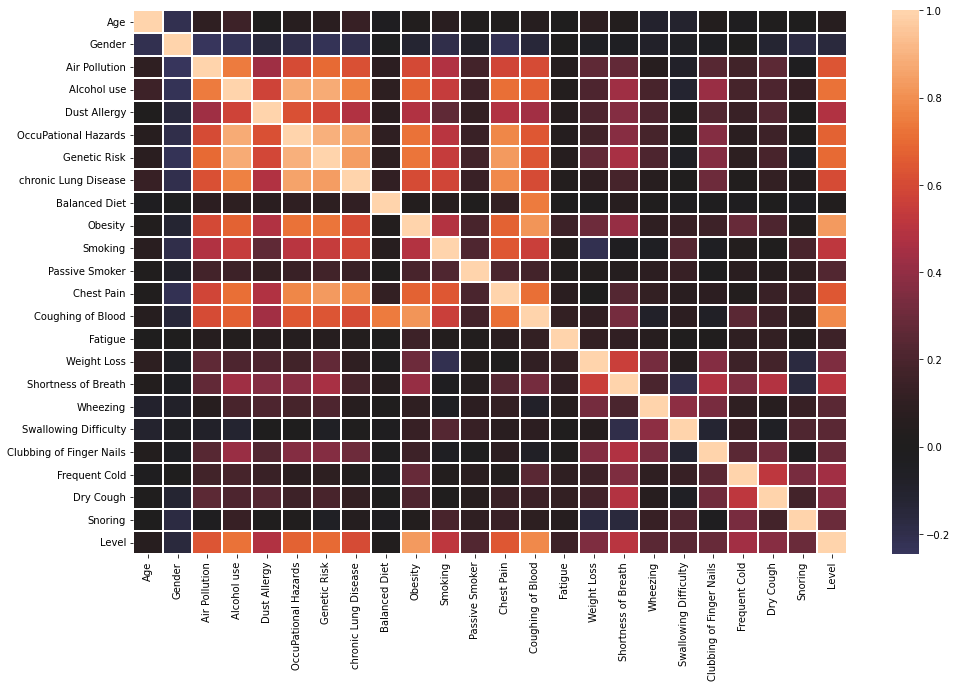

In [8]:
# create and plot the correlation
# method = pearson
fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(df_corr.corr(method='pearson'), linewidths=0.1, center=0)

<AxesSubplot:>

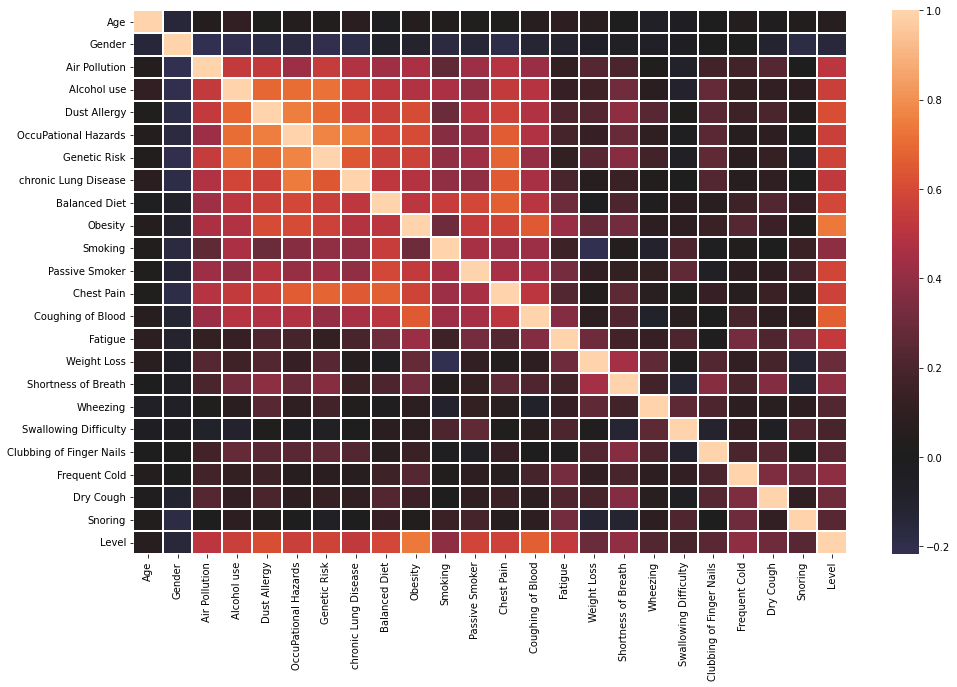

In [9]:
# method = pearson
fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(df_corr.corr(method='kendall'), linewidths=0.1, center=0)

<AxesSubplot:>

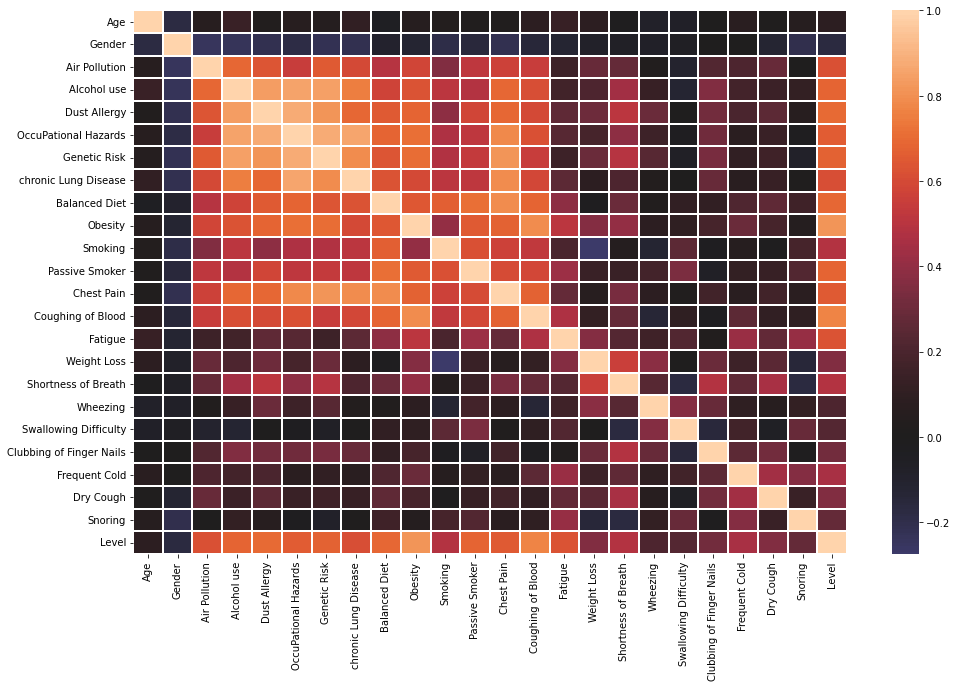

In [10]:
# method = pearson
fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(df_corr.corr(method='spearman'), linewidths=0.1, center=0)

## Handling Outliers

In [11]:
# check for the outliers
fig = go.Figure()

for var in df_corr.columns:
    fig.add_trace(go.Box(y=df_corr[var],
                         name=var,
                         marker_color=["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])][0]
    ))
    
fig.update_layout(yaxis_title='Value',
                  xaxis_title='Variable',
                  showlegend=False
)
fig.show()